# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
from io import BytesIO
from PIL import Image
import cv2

In [2]:
df = pd.read_csv("Train.csv")
df["img_name"] = df["UID"].apply(lambda x: ".".join([x, "jpeg"]))
df.head()

,UID,growth_stage,label_quality,img_name
0,nwuCTQKz,4,2,nwuCTQKz.jpeg
1,NVGUOzWu,1,1,NVGUOzWu.jpeg
2,1IYVvHwA,1,1,1IYVvHwA.jpeg
3,8OEdWwmU,1,1,8OEdWwmU.jpeg
4,oc5iO04j,1,1,oc5iO04j.jpeg


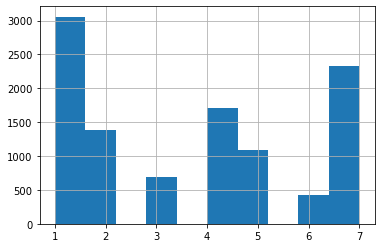

In [3]:
df["growth_stage"].hist()

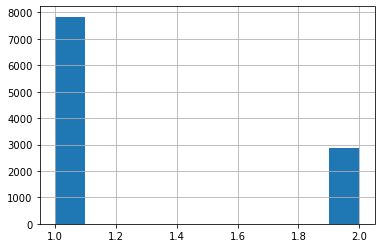

In [4]:
df["label_quality"].hist()

4

In [33]:
#Вытаскиваю из 1 категории настоящие 1 стадии(до 4 листьев)
df.loc[2074,"label_quality"] = 0 # фото пейзажа из машины
df.loc[7488,"label_quality"] = 2 # точно голое поле
df.loc[10048,"label_quality"] = 0 # полностью черная картинка
df.loc[590,"label_quality"] = 2 # точно голое поле
df.loc[8207,"label_quality"] = 2 # точно голое поле
df.loc[2814,"label_quality"] = 2 # точно голое поле
df.loc[2528,"label_quality"] = 2 # точно голое поле
df.loc[7467,"label_quality"] = 2 # точно голое поле
df.loc[6956,"label_quality"] = 2 # точно голое поле
df.loc[8506,"label_quality"] = 2 # точно голое поле
df.loc[7611,"label_quality"] = 2 # точно голое поле


df.loc[7209,"label_quality"] = 2 # почти голое поле
df.loc[4294,"label_quality"] = 2 # почти голое поле
df.loc[1799,"label_quality"] = 2 # почти голое поле
df.loc[2035,"label_quality"] = 2 # почти голое поле
df.loc[2494,"label_quality"] = 2 # почти голое поле
df.loc[24,"label_quality"] = 2 # почти голое поле

df.loc[10338,"label_quality"] = 2 # почти голое поле
df.loc[2753,"label_quality"] = 0 # не пшеница, а какие-то цветы


#Ремонт 4 категории
df.loc[4252,"label_quality"] = 1 # половина фото занимает куча земли 
df.loc[10453,"label_quality"] = 1 # очень размытое фото 
df.loc[10449,"label_quality"] = 1 # что-то я сильно сомневаюсь, что эти травинки 4 стадии роста

#Ремонт 6 категории
df.loc[10507,"label_quality"] = 0 # грядки капусты

df[df["img_name"] == "zQNfsy6c.jpeg"]


,UID,growth_stage,label_quality,img_name,width,height
10507,zQNfsy6c,6,0,zQNfsy6c.jpeg,512,184


In [18]:
#Ремонт 2 стадии. Убираю из экспертной 2 стадии голую землю
df.loc[4723,"growth_stage"] = 1 # почти голое поле
df.loc[4227,"growth_stage"] = 1 # почти голое поле
df.loc[10208,"growth_stage"] = 1 # почти голое поле
df.loc[4513,"growth_stage"] = 1 # почти голое поле
df.loc[343,"growth_stage"] = 1 # почти голое поле
df.loc[10646,"growth_stage"] = 1 # почти голое поле

df.loc[2156,"growth_stage"] = 1 # голое поле
df.loc[4127,"growth_stage"] = 1 # голое поле
df.loc[1680,"growth_stage"] = 1 # голое поле
df.loc[3603,"growth_stage"] = 1 # голое поле

df.loc[122,"growth_stage"] = 2 # почти голое поле
df[df["img_name"] == "ZOcgQ4GM.jpeg"]

,UID,growth_stage,label_quality,img_name,width,height
2156,ZOcgQ4GM,1,2,ZOcgQ4GM.jpeg,512,120


In [17]:
len(os.listdir("images/Images/"))

14253

In [34]:
#Файл с пофиксенными метками
df.to_csv("Train_fixed.csv", index=False)

In [22]:
folder = "images/Images"

def get_width(img_name):
    img_path = os.path.join(folder, img_name)
        # Read an image with OpenCV
    image = cv2.imread(img_path)
    return image.shape[1]

def get_height(img_name):
    img_path = os.path.join(folder, img_name)
        # Read an image with OpenCV
    image = cv2.imread(img_path)
    return image.shape[0]

df["width"] = df["img_name"].apply(lambda x: get_width(x))
df["height"] = df["img_name"].apply(lambda x: get_height(x))
df.head(10)
    
        

    

,UID,growth_stage,label_quality,img_name,width,height
0,nwuCTQKz,4,2,nwuCTQKz.jpeg,512,147
1,NVGUOzWu,1,1,NVGUOzWu.jpeg,512,180
2,1IYVvHwA,1,1,1IYVvHwA.jpeg,512,183
3,8OEdWwmU,1,1,8OEdWwmU.jpeg,512,167
4,oc5iO04j,1,1,oc5iO04j.jpeg,512,175
5,A60rOyP9,1,1,A60rOyP9.jpeg,512,202
6,TnVJ3pgC,6,1,TnVJ3pgC.jpeg,512,236
7,sYLqmiXV,3,2,sYLqmiXV.jpeg,512,180
8,Q5iyu8IP,7,1,Q5iyu8IP.jpeg,512,171
9,s2X0it4L,1,1,s2X0it4L.jpeg,512,160


15 491 178.0


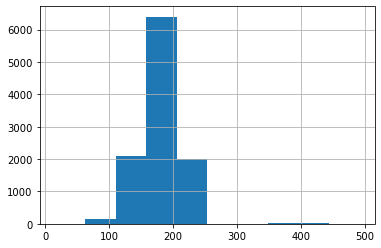

In [23]:
print(df["height"].min(), df["height"].max(),  df["height"].median())
df["height"].hist()

316 640 512.0


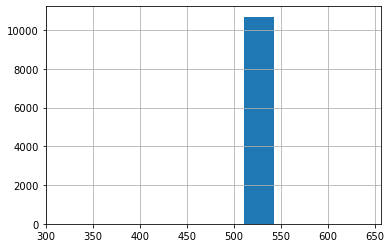

In [24]:
print(df["width"].min(), df["width"].max(), df["width"].median())
df["width"].hist()

## Делаю большие картинки

In [26]:
from PIL import Image


baseheight = 224
target_folder = "images/bigImages"
for i in os.listdir("images/Images/"):
    #print(i)
    img_path = os.path.join("images/Images/", i)
    img = Image.open(img_path)
    width, height = img.size
    #print(img)
    images = [img, img, img]
    #print("height", images[2].size[1])
    new_height = images[2].size[1]
    while new_height < 2 * baseheight:
        images[2] = np.vstack([images[1], images[0]])
        #print(images[2].shape)
        images[1] = images[2]
        #print("height", images[2].shape[0])
        new_height = images[2].shape[0]
        

    # если картинка склеена, то она - массив, а если нет, то PIL объект
    try:
        #images[2].save(os.path.join(target_folder, i[1]["img_name"]))
        images[2].save(os.path.join(target_folder, i))
    except:
        Image.fromarray(images[2]).save(os.path.join(target_folder, i))

## Датасет с label_quality == 2

In [28]:
sm_df = df[df["label_quality"] == 2]
sm_df.shape

(2869, 6)

In [29]:
sm_df.to_csv("small_test.csv", index=False)

In [30]:
sm_df.groupby("growth_stage").count() / sm_df.shape[0]


,UID,label_quality,img_name,width,height
growth_stage,,,,,
1,0.009411,0.009411,0.009411,0.009411,0.009411
2,0.157895,0.157895,0.157895,0.157895,0.157895
3,0.240153,0.240153,0.240153,0.240153,0.240153
4,0.389334,0.389334,0.389334,0.389334,0.389334
5,0.087487,0.087487,0.087487,0.087487,0.087487
7,0.115720,0.115720,0.115720,0.115720,0.115720


## Отфильтровывание отдельных категорий


In [31]:
target_folder = "images/6_stage"
for i in df[df["growth_stage"] == 6].iterrows():
    img_path = os.path.join(folder, i[1]["img_name"])
    img = Image.open(img_path)
    img.save(os.path.join(target_folder, i[1]["img_name"]))


In [ ]:
df[df["growth_stage"] > 1][df["label_quality"] == 1]

In [ ]:
df[df["img_name"] == "nyBg0Q2c.jpeg"]